In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
pd.set_option("display.width", 1000)
pd.set_option("display.max_columns", 1000)

In [45]:
def clean_GTPD_data(data):
    
    drop_categories = ['OCANumber', 'IncidentFromTime', 'IncidentToDate', 'CaseDisposition', 'LocationCode',
                       'PatrolZone', 'LocationStreetNumber', 'LocationDirectional', 'LocationStreet', 'CreatedSource',
                      'LocationLatitude', 'LocationLongitude', 'IncidentToTime']
    cleaned_data = data.drop(labels=drop_categories, axis=1)
    return cleaned_data

In [36]:
'''
@return returns a pandas dataframe with cleaned weather data SPECIFICALLY for precipitation. Please remove whatever attribute
you wish to analyze in the weather_drop_categories list. This is expected to take a couple of minutes.
'''
def clean_weather_data():
    weather_data = pd.read_csv('../weather_data.csv')
    weather_drop_categories = ['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION',
       'AWND', 'AWND_ATTRIBUTES', 'PGTM', 'PGTM_ATTRIBUTES', 'PSUN', 'PSUN_ATTRIBUTES', 'SNOW',
       'SNOW_ATTRIBUTES', 'SNWD', 'SNWD_ATTRIBUTES', 'TAVG',
       'TAVG_ATTRIBUTES', 'TMAX', 'TMAX_ATTRIBUTES', 'TMIN',
       'TMIN_ATTRIBUTES', 'TSUN', 'TSUN_ATTRIBUTES', 'WDF2',
       'WDF2_ATTRIBUTES', 'WDF5', 'WDF5_ATTRIBUTES', 'WESD',
       'WESD_ATTRIBUTES', 'WESF', 'WESF_ATTRIBUTES', 'WSF2',
       'WSF2_ATTRIBUTES', 'WSF5', 'WSF5_ATTRIBUTES', 'WT01',
       'WT01_ATTRIBUTES', 'WT02', 'WT02_ATTRIBUTES', 'WT03',
       'WT03_ATTRIBUTES', 'WT06', 'WT06_ATTRIBUTES', 'WT08',
       'WT08_ATTRIBUTES', 'PRCP_ATTRIBUTES']
    weather_cleaned = weather_data.drop(labels=weather_drop_categories, axis=1)
    dates = weather_cleaned['DATE'].tolist()
    for i in range(len(dates)):
    date_list = dates[i].split('-')
    if date_list[1][0] == "0":
        date_list[1] = date_list[1][1]
    if date_list[2][0] == "0":
        date_list[2] = date_list[2][1]
    date = date_list[1] + "/" + date_list[2] + "/" + date_list[0]
    weather_cleaned['DATE'][i] = date
    return weather_data

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,AWND_ATTRIBUTES,PGTM,PGTM_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,PSUN,PSUN_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TSUN,TSUN_ATTRIBUTES,WDF2,WDF2_ATTRIBUTES,WDF5,WDF5_ATTRIBUTES,WESD,WESD_ATTRIBUTES,WESF,WESF_ATTRIBUTES,WSF2,WSF2_ATTRIBUTES,WSF5,WSF5_ATTRIBUTES,WT01,WT01_ATTRIBUTES,WT02,WT02_ATTRIBUTES,WT03,WT03_ATTRIBUTES,WT06,WT06_ATTRIBUTES,WT08,WT08_ATTRIBUTES
0,US1GAFT0045,"ATLANTA 3.6 E, GA US",33.7603,-84.3596,292.6,2015-10-13,NaN,NaN,NaN,NaN,0.06,",,N",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US1GAFT0045,"ATLANTA 3.6 E, GA US",33.7603,-84.3596,292.6,2015-10-27,NaN,NaN,NaN,NaN,0.54,",,N",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US1GAFT0045,"ATLANTA 3.6 E, GA US",33.7603,-84.3596,292.6,2015-10-28,NaN,NaN,NaN,NaN,0.36,",,N",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US1GAFT0045,"ATLANTA 3.6 E, GA US",33.7603,-84.3596,292.6,2015-10-29,NaN,NaN,NaN,NaN,0.10,",,N",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US1GAFT0045,"ATLANTA 3.6 E, GA US",33.7603,-84.3596,292.6,2015-11-01,NaN,NaN,NaN,NaN,0.68,",,N",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
### Get GTPD Data ###
os.chdir('E:/GT/GT_DataScience/AtlCrime/Data')
print ('cwd = ', os.getcwd())
crime_files = ['2013 Crime Log.csv', '2014 Crime Log.csv', '2015 Crime Log.csv', '2016 Crime Log.csv', '2017 Crime Log.csv']
allLogs = []
for file in crime_files:
    data = pd.read_csv(file)
    data = clean_GTPD_data(data)
    allLogs.append(data)
GTPD_data = pd.concat(allLogs)

cwd =  E:\GT\GT_DataScience\AtlCrime\Data


In [55]:
GTPD_data.head(5)

,IncidentFromDate,OffenseCode,Offense Description,CaseStatus,LocationLandmark
0,01/01/2013,4104,Liquor – Possession Of,Closed/Cleared,Cloudman Residence Hall
1,01/01/2013,9999,Non-Crime (not reported to state),Closed/Cleared,Georgia Tech Hotel & Conference Center
2,01/01/2013,1313,Simple Assault/Battery,Closed/Cleared,Georgia Tech Hotel & Conference Center
3,01/01/2013,1313,Simple Assault/Battery,Closed/Cleared,Georgia Tech Hotel & Conference Center
4,01/01/2013,5404,Driving Under the Influence of Alcohol,Closed/Cleared,"Ferst Drive, NW @ Sixth Street, NW"


In [56]:
weather_cleaned.head(5)

,DATE,PRCP
0,10/13/2015,0.06
1,10/27/2015,0.54
2,10/28/2015,0.36
3,10/29/2015,0.10
4,11/1/2015,0.68


In [57]:
column_names = weather_cleaned.columns.tolist()
column_names

['DATE', 'PRCP']

In [59]:
column_names = weather_cleaned.columns.tolist()
column_names[0] = "IncidentFromDate"
weather_cleaned.columns = column_names
GTPD_weather = weather_cleaned.merge(GTPD_data, on="IncidentFromDate")

In [60]:
GTPD_weather.head(5)

,IncidentFromDate,PRCP,OffenseCode,Offense Description,CaseStatus,LocationLandmark
0,10/13/2015,0.06,9999,Non-Crime (not reported to state),Closed/Cleared,Library 77 Z2
1,10/13/2015,0.06,9999,Non-Crime (not reported to state),Closed/Cleared,Barnes and Noble Bookstore
2,10/13/2015,0.06,2903,Damage to Property – Public,Inactive,Klaus Advanced Computing Building 153 Z3
3,10/13/2015,0.24,9999,Non-Crime (not reported to state),Closed/Cleared,Library 77 Z2
4,10/13/2015,0.24,9999,Non-Crime (not reported to state),Closed/Cleared,Barnes and Noble Bookstore


In [70]:
'''
Because we only care about what happened in each year (not the specific month and day), I am converting all dates to simply
represent the year. This code will take a little while to run - there is a much more efficient way to code this but I was lazy.
'''
dates = GTPD_weather['IncidentFromDate'].tolist()
for i in range(len(dates)):
    split = dates[i].split("/")
    if split[2] == '2013':
        GTPD_weather['IncidentFromDate'][i] = '2013'
    elif split[2] == '2014':
        GTPD_weather['IncidentFromDate'][i] = '2014'
    elif split[2] == '2015':
        GTPD_weather['IncidentFromDate'][i] = '2015'
    elif split[2] == '2016':
        GTPD_weather['IncidentFromDate'][i] = '2016'
    elif split[2] == '2017':
        GTPD_weather['IncidentFromDate'][i] = '2017'
    elif split[2] == '2018':
        GTPD_weather['IncidentFromDate'][i] = '2018'
GTPD_weather.head(5)

C:\Users\kevin\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\kevin\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\kevin\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\kevin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 

,IncidentFromDate,PRCP,OffenseCode,Offense Description,CaseStatus,LocationLandmark
0,2015,0.06,9999,Non-Crime (not reported to state),Closed/Cleared,Library 77 Z2
1,2015,0.06,9999,Non-Crime (not reported to state),Closed/Cleared,Barnes and Noble Bookstore
2,2015,0.06,2903,Damage to Property – Public,Inactive,Klaus Advanced Computing Building 153 Z3
3,2015,0.24,9999,Non-Crime (not reported to state),Closed/Cleared,Library 77 Z2
4,2015,0.24,9999,Non-Crime (not reported to state),Closed/Cleared,Barnes and Noble Bookstore


In [75]:
crime_rain = []
total_incidents = []
crime_dict = {}
for i in range(10):
    num = i * 0.1
    crime_rain.append(len(GTPD_weather[(GTPD_weather['PRCP'] < num) & (GTPD_weather['OffenseCode'] != '9999W')]))
    total_incidents.append(len(GTPD_weather[(GTPD_weather['PRCP'] < num)]))

In [76]:
print (crime_rain)
print (total_incidents)

[0, 34176, 35975, 37424, 38159, 38883, 39511, 40003, 40351, 40713]
[0, 35089, 36933, 38411, 39163, 39898, 40540, 41045, 41402, 41772]


In [91]:
code_mapping = {}
offense_codes = GTPD_weather['OffenseCode'].tolist()
offense_description = GTPD_weather['Offense Description'].tolist()
for i in range(len(offense_codes)):
    if offense_codes[i] not in code_mapping.keys():
        code_mapping[offense_codes[i]] = offense_description[i]

In [138]:
crime_dict = {}
precip = GTPD_weather['PRCP'].tolist()
crimes = GTPD_weather['OffenseCode'].tolist()
dict_1 = {}
dict_2 = {}
dict_3 = {}
dict_4 = {}
dict_5 = {}
dict_6 = {}
dict_7 = {}
dict_8 = {}
dict_9 = {}
dict_10 = {}
for j in range(10):
    threshold = j * 0.1 + 0.1
    print ('Threshold = ', threshold)
    for i in range(len(crimes)):
#         print ('crime[i] = ', crimes[i])
        if j == 0:
            if precip[i] < threshold and precip[i] > (threshold - 0.1):
                if crimes[i] not in dict_1.keys():
                    dict_1[crimes[i]] = 1
                else:
                    dict_1[crimes[i]] += 1
        elif j == 1:
#             print ('precip[i] = ', precip[i])
            if precip[i] < threshold and precip[i] > (threshold - 0.1):
                if crimes[i] not in dict_2.keys():
                    dict_2[crimes[i]] = 1
                else:
                    dict_2[crimes[i]] += 1
        elif j == 2:
            if precip[i] < threshold and precip[i] > (threshold - 0.1):
                if crimes[i] not in dict_3.keys():
                    dict_3[crimes[i]] = 1
                else:
                    dict_3[crimes[i]] += 1
        elif j == 3:
            if precip[i] < threshold and precip[i] > (threshold - 0.1):
                if crimes[i] not in dict_4.keys():
                    dict_4[crimes[i]] = 1
                else:
                    dict_4[crimes[i]] += 1
        elif j == 4:
            if precip[i] < threshold and precip[i] > (threshold - 0.1):
                if crimes[i] not in dict_5.keys():
                    dict_5[crimes[i]] = 1
                else:
                    dict_5[crimes[i]] += 1
        elif j == 5:
            if precip[i] < threshold and precip[i] > (threshold - 0.1):
                if crimes[i] not in dict_6.keys():
                    dict_6[crimes[i]] = 1
                else:
                    dict_6[crimes[i]] += 1
        elif j == 6:
            if precip[i] < threshold and precip[i] > (threshold - 0.1):
                if crimes[i] not in dict_7.keys():
                    dict_7[crimes[i]] = 1
                else:
                    dict_7[crimes[i]] += 1
        elif j == 7:
            if precip[i] < threshold and precip[i] > (threshold - 0.1):
                if crimes[i] not in dict_8.keys():
                    dict_8[crimes[i]] = 1
                else:
                    dict_8[crimes[i]] += 1
        elif j == 8:
            if precip[i] < threshold and precip[i] > (threshold - 0.1):
                if crimes[i] not in dict_9.keys():
                    dict_9[crimes[i]] = 1
                else:
                    dict_9[crimes[i]] += 1
        elif j == 9:
            if precip[i] < threshold and precip[i] > (threshold - 0.1):
                if crimes[i] not in dict_10.keys():
                    dict_10[crimes[i]] = 1
                else:
                    dict_10[crimes[i]] += 1

Threshold =  0.1
Threshold =  0.2
Threshold =  0.30000000000000004
Threshold =  0.4
Threshold =  0.5
Threshold =  0.6
Threshold =  0.7000000000000001
Threshold =  0.8
Threshold =  0.9
Threshold =  1.0


In [115]:
def get_top_10_crimes(dict_):
    list_10 = []
    list_10_value = []
    sorted_ = sorted(dict_.values())
    top10_values = sorted_[-10:]
    for eachKey in dict_.keys():
        if dict_[eachKey] in top10_values:
            list_10.append(eachKey)
            list_10_value.append(dict_[eachKey])
    list_10_key = []
    for each_ in list_10:
        list_10_key.append(code_mapping[each_])
    return (list_10_key, list_10_value)

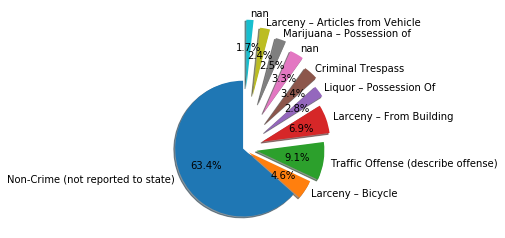

In [126]:
top10_codes, top10_values = get_top_10_crimes(dict_1)
### Pie Chart ###
labels = top10_codes
values = top10_values
explode = [0.1 * x for x in range(10)]

fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

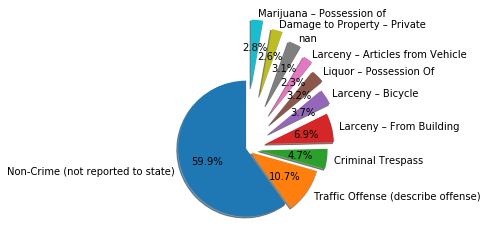

In [140]:
top10_codes, top10_values = get_top_10_crimes(dict_2)
### Pie Chart ###
labels = top10_codes
values = top10_values
explode = [0.1 * x for x in range(10)]

fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

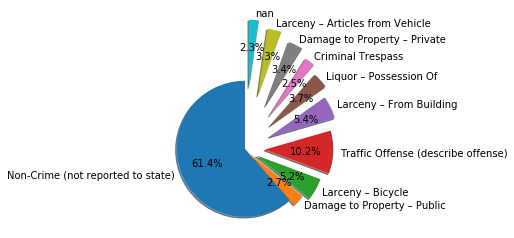

In [141]:
top10_codes, top10_values = get_top_10_crimes(dict_3)
### Pie Chart ###
labels = top10_codes
values = top10_values
explode = [0.1 * x for x in range(10)]

fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

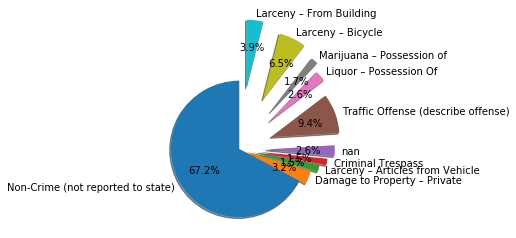

In [142]:
top10_codes, top10_values = get_top_10_crimes(dict_4)
### Pie Chart ###
labels = top10_codes
values = top10_values
explode = [0.1 * x for x in range(10)]

fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

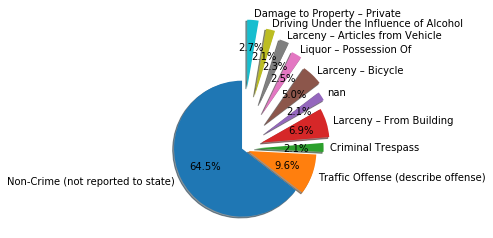

In [143]:
top10_codes, top10_values = get_top_10_crimes(dict_5)
### Pie Chart ###
labels = top10_codes
values = top10_values
explode = [0.1 * x for x in range(10)]

fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

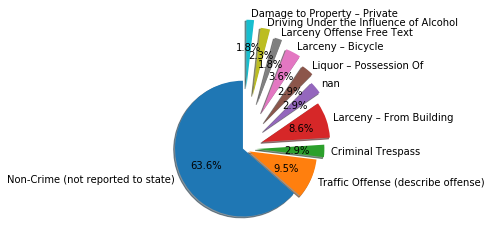

In [144]:
top10_codes, top10_values = get_top_10_crimes(dict_6)
### Pie Chart ###
labels = top10_codes
values = top10_values
explode = [0.1 * x for x in range(10)]

fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

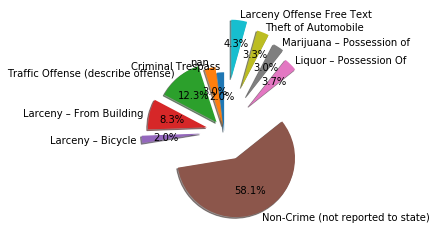

In [152]:
top10_codes, top10_values = get_top_10_crimes(dict_8)
### Pie Chart ###
labels = top10_codes
values = top10_values
explode = [0.1 * x for x in range(10)]

fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

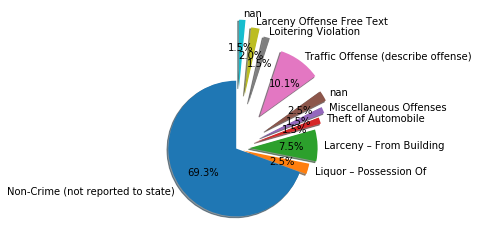

In [156]:
top10_codes, top10_values = get_top_10_crimes(dict_10)
### Pie Chart ###
labels = top10_codes
values = top10_values
explode = [0.1 * x for x in range(10)]

fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [157]:
## Save CSV ##
GTPD_weather.to_csv("GTPD_weather.csv")